In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import tensorflow as tf
import keras_tuner
import json
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv(r"D:\DL\ann_model_regression_energy_effecency\data\processed\energy_efficiency.csv")
df.shape

(768, 7)

In [7]:
x=df.drop(columns=["Heating_Load"])
y=df["Heating_Load"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaller=StandardScaler()
x_train=scaller.fit_transform(x_train)
x_test=scaller.transform(x_test)
x_train,x_test

(array([[ 0.55367107, -0.6962224 , -0.00737214, -0.67904812,  1.01642146,
         -1.01029954],
        [-1.15511771,  1.25066366,  0.55843925,  0.95706259, -0.98384385,
          1.22779036],
        [ 0.93340191, -0.97434898, -0.57318352, -0.67904812,  1.01642146,
          0.10874541],
        ...,
        [-0.49058874,  0.41628392, -1.13899491,  0.95706259, -0.98384385,
         -1.01029954],
        [ 2.07259443, -1.80872872, -0.57318352, -1.49710347,  1.01642146,
          0.10874541],
        [ 1.31313275, -1.25247556, -0.00737214, -1.22441835,  1.01642146,
         -1.01029954]], shape=(614, 6)),
 array([[-1.34498313,  1.52879024,  1.12425064,  0.95706259, -0.98384385,
          1.22779036],
        [-0.96525229,  0.97253708, -0.00737214,  0.95706259, -0.98384385,
          0.10874541],
        [ 2.07259443, -1.80872872, -0.57318352, -1.49710347,  1.01642146,
          1.22779036],
        [ 0.26887294, -0.41809582,  0.55843925, -0.67904812,  1.01642146,
          1.22779036],

In [3]:
with open("D:\\DL\\ann_model_regression_energy_effecency\\tuning_params\\best_hyperparameters.json", "r") as f:
    loaded_params = json.load(f)

In [4]:
loaded_params

{'num_layers': 4,
 'units_0': 128,
 'activation_0': 'tanh',
 'dropout_0': 0.1,
 'optimizer': 'adam',
 'units_1': 80,
 'activation_1': 'tanh',
 'dropout_1': 0.1,
 'units_2': 32,
 'activation_2': 'relu',
 'dropout_2': 0.0,
 'units_3': 32,
 'activation_3': 'relu',
 'dropout_3': 0.0}

In [11]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(6,)),
    tf.keras.layers.Dense(loaded_params["units_0"], activation=loaded_params["activation_0"]),
    tf.keras.layers.Dropout(loaded_params["dropout_0"]),
    tf.keras.layers.Dense(loaded_params["units_1"], activation=loaded_params["activation_1"]),
    tf.keras.layers.Dropout(loaded_params["dropout_1"]),
    tf.keras.layers.Dense(loaded_params["units_2"], activation=loaded_params["activation_2"]),
    tf.keras.layers.Dropout(loaded_params["dropout_2"]),
    tf.keras.layers.Dense(loaded_params["units_3"], activation=loaded_params["activation_3"]),
    tf.keras.layers.Dropout(loaded_params["dropout_3"]),
    tf.keras.layers.Dense(1, activation="linear")
])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │        10,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,897 (58.19 KB)

 Trainable params: 14,897 (58.19 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer=loaded_params["optimizer"], loss='mean_squared_error', metrics=['mae'])

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),callbacks=[early_stop])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 524.6537 - mae: 20.6615 - val_loss: 449.2347 - val_mae: 18.9341
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 285.3039 - mae: 14.4372 - val_loss: 114.4680 - val_mae: 8.4583
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.2587 - mae: 4.8170 - val_loss: 32.2676 - val_mae: 4.4958
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.9384 - mae: 3.9078 - val_loss: 22.0894 - val_mae: 3.5688
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.4231 - mae: 3.4209 - val_loss: 20.2082 - val_mae: 3.4674
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9698 - mae: 3.1650 - val_loss: 17.6316 - val_mae: 3.1606
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8335 - mae: 2.9053 - val_loss: 14.0377 - val_mae: 2.6947
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.6695 - mae: 2.4321 - val_loss: 11.3851 - val_mae: 2.3280
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
r2_score(y_test, model.predict(x_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


0.9933971879749864

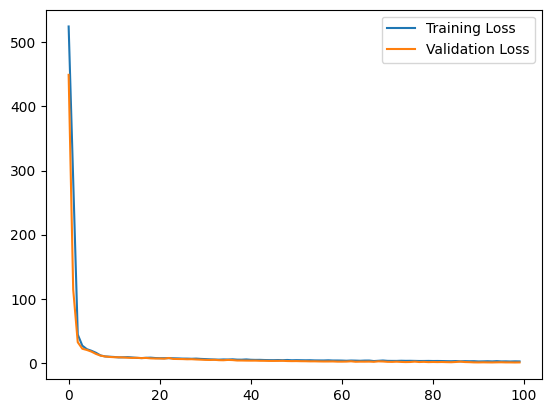

In [18]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [21]:
joblib.dump(scaller, r"D:\DL\ann_model_regression_energy_effecency\scaller\scaller.pkl")

['D:\\DL\\ann_model_regression_energy_effecency\\scaller\\scaller.pkl']

In [22]:
joblib.dump(model, r"D:\DL\ann_model_regression_energy_effecency\model\model.pkl")

['D:\\DL\\ann_model_regression_energy_effecency\\model\\model.pkl']